In [205]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd
from copy import deepcopy
from collections import Counter
data=pd.read_csv('data.csv')
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# 2_1. Dimensionality Reduction

In [206]:
inputdata = data.drop(data.columns[-1],axis=1)
mean=np.mean(inputdata)
stdev=np.std(inputdata)
for i in range(len(inputdata.columns)):
    inputdata[inputdata.columns[i]]= [(1.0 * (c-mean[i]))/stdev[i] for c in inputdata[inputdata.columns[i]]]

    
arraydata = np.array(inputdata)
M = np.mean(arraydata.T, axis=1)

In [207]:
C = arraydata - M
V = np.cov(C.T)
values, vectors = np.linalg.eig(V)
P = vectors.T.dot(C.T)
pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]
pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in pairs:
    print(i[0])

Eigenvalues in descending order:
6.737920098778811
4.863943231544694
2.613043439262609
1.8882501946527517
1.4723910330642602
1.3444548938316083
1.1368678417617097
1.0559921708769135
1.0060598935983283
0.9977470221573698
0.9628847267774475
0.9190316732959518
0.7169974246618572
0.6557230236289275
0.49685688285136786
0.4475306562101165
0.4121198200324062
0.4021138123202624
0.34521972533284173
0.21020429520847264
0.09709016921701344
0.06648276418226064
0.05218760408528199
0.03964589445967815
0.028902563925458112
0.016369753032540978
0.009490768671108561
0.004634684515619017
0.0010040772815138055


In [208]:
total = sum(values)
varexp = [(i / total)*100 for i in sorted(values, reverse=True)]
cumulative= np.cumsum(varexp)

In [209]:
k=1
for c in cumulative:
    if c>=90:
        break
    k+=1
k

14

Since the variance becomes > 90 after the first two attributes. K=14

In [210]:
matrix = pairs[0][1].reshape(len(inputdata.columns),1);
for i in range(1,14):
    matrix = np.insert(matrix, matrix.shape[1], np.hstack(pairs[i][1].reshape(29,1)), axis=1)
inputdata = inputdata.dot(matrix)

# 2_2. K Means

In [211]:

mean=np.mean(inputdata)
stdev=np.std(inputdata)

for i in range(len(inputdata.columns)-1):
    inputdata[inputdata.columns[i]]= [(1.0 * (c-mean[i]))/stdev[i] for c in inputdata[inputdata.columns[i]]]


In [212]:
inputdata = np.array(inputdata)
m=inputdata.shape[0] #number of training examples
c=inputdata.shape[1] #number of features. Here n=2
k=5
rand=rd.randint(0,m-1)
centers= np.array(inputdata[rand])

for i in range(4):
    rand=rd.randint(0,m-1)
    centers = np.vstack((centers,inputdata[rand]))

In [213]:
error = 99999
distances = np.zeros((m,k))

while error >= 0.001:
    for i in range(k):
        distances[:,i] = np.linalg.norm(inputdata - centers[i], axis=1)
    
    clusters = np.argmin(distances, axis = 1)
    
    centersold = deepcopy(centers)

    for i in range(k):
        centers[i] = np.mean(inputdata[clusters == i], axis=0)
    
    error = np.linalg.norm(centers - centersold)
    print(error)

6.271919696190618
0.7483582167949818
0.755170758377465
0.17313707503612707
0.1983428913229612
0.2225465594325957
0.24528166752153982
0.44467178347393677
0.5035322134721526
0.42199371306803257
0.1807633306401761
0.12554341197624927
0.0805026682150415
0.04991606844376824
0.027641274071463127
0.02535243756691621
0.038357221801994724
0.0321983719550724
0.016484497664551383
0.010840294739894587
0.010923375157678552
0.00622386628835682
0.006172978640621566
0.004275549753751142
0.0020911252259364897
0.0012429348948050202
0.0010989758150566351
0.0


In [224]:
def pre_dict(clusters, inputdata):
    predicted={}
    for i in range(len(clusters)):
        cl = clusters[i]
        if cl in predicted:
            predicted[cl].append(inputdata[i])
        else:
            predicted[cl]=[]
            predicted[cl].append(inputdata[i])
    
    purity=[]
    for cl in predicted:
        keys=[]
    
        for onelist in predicted[cl]:
            keys.append(onelist[14])
    
        c = Counter(keys)
        print(len(keys))
        value, count = c.most_common() [0]
        purity.append((value, (count/len(keys))))
    return purity

In [215]:
df = pd.DataFrame(inputdata)
df[14] = np.array(data[data.columns[-1]])
inputdata = np.array(df)
purity = pre_dict(clusters,inputdata)

In [217]:
averagekmeans=0
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averagekmeans+=purity[i][1]
averagekmeans/=len(purity)

normal 0.8263324299909666
dos 0.9924120822997228
probe 0.5603937902309731
normal 0.603182256509161
normal 0.636986301369863


In [218]:
df = df.drop(columns = [14])

# 1_3. GMM

In [219]:
inputdata = np.array(df)
GMM = GaussianMixture(n_components=5).fit(inputdata)
print('Converged:',GMM.converged_)
means = GMM.means_ 
covariances = GMM.covariances_
prediction = GMM.predict(inputdata)
df = pd.DataFrame(inputdata)
df[14] = np.array(data[data.columns[-1]])
inputdata = np.array(df)
purity = pre_dict(prediction, inputdata)

Converged: True


In [221]:
averagegmm=0
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averagegmm+=purity[i][1]
averagegmm/=len(purity)

normal 0.9478603049680275
dos 0.9992175273865415
normal 0.6991788503905467
normal 0.513461996664284
normal 1.0


# 1_4. Hierarchical Clustering

In [222]:
df = df.drop(columns = [14])

In [223]:
inputdata = np.array(df)
hierClusters = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='single', memory=None, n_clusters=5, pooling_func='deprecated') 
hierClusters.fit(inputdata)
hierClusters.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [226]:
df = pd.DataFrame(inputdata)
df[14] = np.array(data[data.columns[-1]])
inputdata = np.array(df)
averageh=0
purity = pre_dict(hierClusters.labels_, inputdata)
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averageh+=purity[i][1]
averageh/=len(purity)

24989
6
1
1
1
normal 0.5346752571131298
r2l 0.6666666666666666
probe 1.0
normal 1.0
probe 1.0


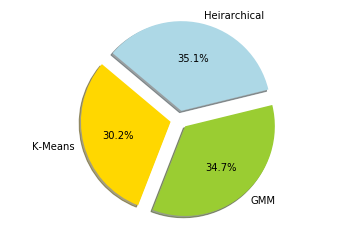

In [230]:
labels = 'K-Means', 'GMM', 'Heirarchical'
sizes = [averagekmeans, averagegmm,averageh]
colors = ['gold', 'yellowgreen', 'lightblue']
explode = (0.1, 0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [231]:
print(averagekmeans, averagegmm,averageh)

0.7238613720801373 0.83194373588188 0.8402683847559593


# Part 5

In [234]:
dfff = pd.read_csv( 'test_data.csv')
dfff

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
5,18012,0,icmp,25,2,304,16414,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
6,15066,0,icmp,29,3,0,44,0,0,0,...,54,0.21,0.02,0.00,0.00,0.00,0.00,0.78,0.98,probe
7,6541,0,icmp,25,5,42340,7300,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.07,0.07,dos
8,10031,4,icmp,48,2,32,93,0,0,0,...,124,0.87,0.02,0.01,0.02,0.00,0.00,0.07,0.00,r2l
9,14225,0,icmp,25,2,249,5656,0,0,0,...,242,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


Many rows are having value 0, hence there is high correlation in data. 
For example, 'srv_error' and 'serror_rate' are  correlated.

Ans: We can use PCA to reduce the features in the data.